In [36]:
# examine outputs

import pickle

log_file = "output/agents_results/math_agents7_rounds4.p"
with open(log_file, "rb") as f:
    data = pickle.load(f)

In [37]:
data.keys()

dict_keys(['12+15*21+0-3*27', '3+7*9+19-21*18', '4+23*6+24-24*12', '26+1*6+7-23*14', '24+17*5+25-13*8', '9+20*19+16-19*5', '15+15*0+18-3*24', '17+19*29+19-19*14', '7+0*1+9-25*0', '10+20*23+3-11*18', '23+28*2+0-0*4', '21+5*6+8-20*17', '15+4*9+10-26*24', '1+1*7+9-25*3', '6+23*11+14-18*27', '0+14*3+21-12*25', '10+20*11+4-6*4', '15+20*3+12-4*20', '8+14*15+20-3*26', '23+15*13+21-21*16', '17+5*9+3-0*5', '0+17*18+4-2*16', '29+3*2+10-13*16', '7+21*9+0-10*18', '11+26*23+27-2*25'])

In [39]:
data['3+7*9+19-21*18']


([[{'role': 'user',
    'content': 'Calculate the result of 3+7*9+19-21*18. Show your work step by step. Make sure to state your answer at the end of the response.'},
   {'role': 'assistant',
    'content': "To calculate the expression 3 + 7*9 + 19 - 21*18, we need to follow the order of operations, which is often remembered by the acronym PEMDAS: Parentheses, Exponents, Multiplication and Division (from left to right), Addition and Subtraction (from left to right).\n\nLet's break it down step by step:\n\n1. Multiplication: Perform the multiplication operations from left to right:\n   - 7 * 9 = 63\n   - 21 * 18 = 378\n\n2. Addition and Subtraction: Perform the addition and subtraction operations from left to right:\n   - 3 + 63 = 66\n   - 66 + 19 = 85\n   - 85 - 378 = -293\n\n3. So, the calculation results in -293.\n\nHowever, it's important to note that this answer is not intuitive, and the sign of the result might seem incorrect based on the order of operations in the expression. Thi

In [40]:
# compare output with correct math_agets6_rounds4
log_file2 = "output/agents_results/math_agents6_rounds4.p"
with open(log_file2, "rb") as f:
    data2 = pickle.load(f)

data2['3+7*9+19-21*18']

([[{'role': 'user',
    'content': 'Calculate the result of 3+7*9+19-21*18. Show your work step by step. Make sure to state your answer at the end of the response.'},
   {'role': 'assistant',
    'content': 'To calculate the expression 3 + 7*9 + 19 - 21*18 following the order of operations (PEMDAS/BODMAS), we need to perform the multiplication and division first, and then addition and subtraction.\n\n1. Perform the multiplication:\n   - 7 * 9 = 63\n   - 21 * 18 = 378\n\n2. Perform the addition and subtraction:\n   - 3 + 63 = 66\n   - 66 + 19 = 85\n   - 85 - 378 = -293\n\nSo, the result of the expression 3 + 7*9 + 19 - 21*18 is -293.'},
   {'role': 'user',
    'content': "These are the recent/updated opinions from other agents: \n\n One agent response: ```To calculate the expression 3 + 7 * 9 + 19 - 21 * 18, we need to follow the order of operations, which is commonly remembered by the acronym PEMDAS: Parentheses, Exponents, Multiplication and Division (from left to right), Addition and

generate figure from paper

In [31]:
# fig 1: math accuracy vs agent number
import os

def get_results_from_txt(result_dir, fig="agents"):
    results = []

    for result_file in os.listdir(result_dir):
        if result_file.endswith(".txt"):
            with open(os.path.join(result_dir, result_file), "r") as f:
                lines = f.readlines()
                last_line = lines[-1]
                accuracy, std = last_line.split(",")
                if fig == "agents": 
                    agent_number = os.path.basename(result_file).split("_")[1][-1]
                elif fig == "rounds":
                    agent_number = os.path.basename(result_file).split("_")[2].split(".")[0][-1]
                results.append((agent_number, accuracy, std))
    return results


In [33]:
# make a plot of accuracy vs agent number

import matplotlib.pyplot as plt

def generate_graph(results, fig="agents"):
    results_int = [(int(agent_number), float(accuracy), float(std)) for agent_number, accuracy, std in results]
    results_sorted = sorted(results_int, key=lambda x: x[0])

    # Unpack the sorted results
    agent_numbers, accuracies, stds = zip(*results_sorted)

    plt.figure(figsize=(10, 6))
    plt.errorbar(agent_numbers, accuracies, yerr=stds, fmt='-o', capsize=5, capthick=2, ecolor='red', marker='s', markersize=5, linestyle='--', linewidth=2, label='Accuracy vs Agent Number')
    if fig == "agents":
        plt.title('Math Accuracy vs Agent Number')
        plt.xlabel('Agent Number')
    elif fig == "rounds":
        plt.title('Math Accuracy vs Round Number')
        plt.xlabel('Debate Rounds')
    plt.ylabel('Accuracy')
    plt.xticks(agent_numbers)
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipykernel_206466/1783506300.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(agent_numbers, accuracies, yerr=stds, fmt='-o', capsize=5, capthick=2, ecolor='red', marker='s', markersize=5, linestyle='--', linewidth=2, label='Accuracy vs Agent Number')
/tmp/ipykernel_206466/1783506300.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(agent_numbers, accuracies, yerr=stds, fmt='-o', capsize=5, capthick=2, ecolor='red', marker='s', markersize=5, linestyle='--', linewidth=2, label='Accuracy vs Agent Number')


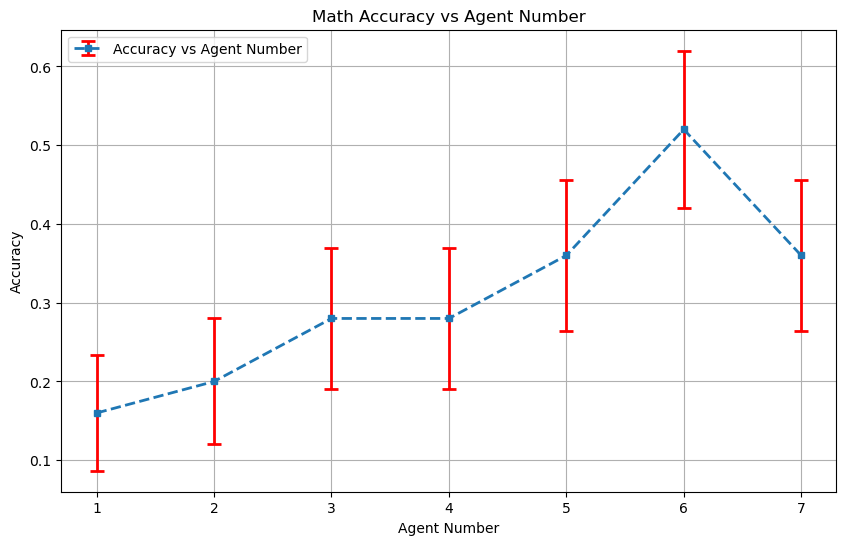

In [34]:
result_dir = "output/agents_results"
agents_results = get_results_from_txt(result_dir)
generate_graph(agents_results)


/tmp/ipykernel_206466/1783506300.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(agent_numbers, accuracies, yerr=stds, fmt='-o', capsize=5, capthick=2, ecolor='red', marker='s', markersize=5, linestyle='--', linewidth=2, label='Accuracy vs Agent Number')
/tmp/ipykernel_206466/1783506300.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(agent_numbers, accuracies, yerr=stds, fmt='-o', capsize=5, capthick=2, ecolor='red', marker='s', markersize=5, linestyle='--', linewidth=2, label='Accuracy vs Agent Number')


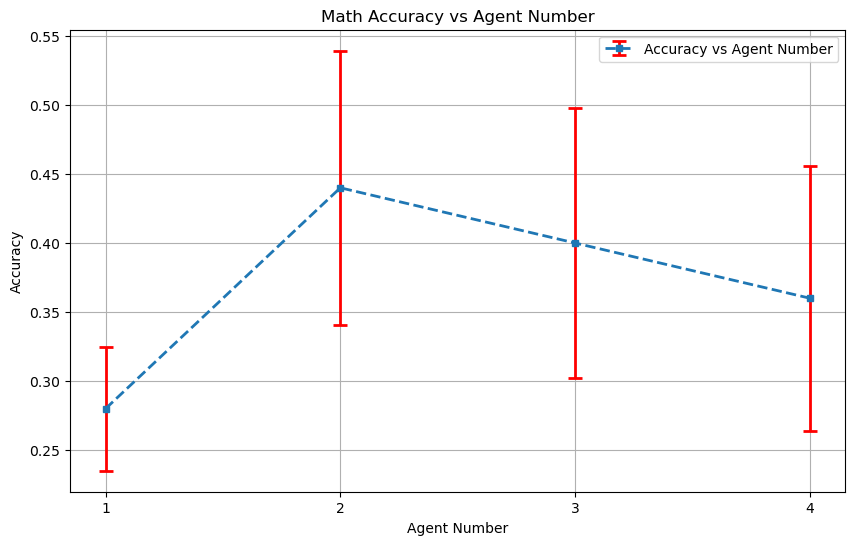

In [35]:
rounds_dir = "output/rounds_results"
rounds_results = get_results_from_txt(rounds_dir, "rounds")
generate_graph(rounds_results)